In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

In [9]:
# Read data
data = pd.read_csv('data_megaentry_2023.csv')

# Change date format
data['DATE'] = pd.to_datetime(data['DATA TIMESTAMP'])

# Rename 
data = data.rename(columns={'RAINFALL 24H RRRR': 'RRRR', 'EVAPORATION 24HOURS MM EEE': 'EEE'})

# Select data
data_24 = data[['DATE', 'RRRR', 'EEE']]

 # select 00 UTC
data_24 = data_24[data_24['DATE'].dt.hour == 0]

# Replace data
data_24['RRRR'] = data_24['RRRR'].replace([9999, 8888], 0)
data_24 = data_24.fillna(0)

# Delete NaN data
# data_24_non_nan = rain_24.dropna()

time = data_24['DATE']
prec = data_24['RRRR']
evap = data_24['EEE']

In [20]:
# Select data by month
feb_data = data_24[data_24['DATE'].dt.month == 2]

# Select data by index
sel_data = data_24.iloc[1:91]

# Select data by date
start_date = pd.to_datetime('2023-02-01T00:00:00.000Z')
end_date = pd.to_datetime('2023-06-01T00:00:00.000Z')

# specific date
select_1_date = data_24[data_24['DATE'].dt.date == start_date.date()]
range_date = data_24[(data_24['DATE'] >= start_date) & (data_24['DATE'] <= end_date)]
multi_date = data_24[data_24['DATE'].dt.date.isin([start_date.date(), end_date.date()])]

In [22]:
"""Statistik Deskriptif"""
# data length
count_data = len(prec)
print(f'Length of data: {count_data}')

# Mean data
data_mean = np.mean(prec)
print(f'Mean Precipitation using numpy: {data_mean:.2f}')

# Max data
data_max = np.max(prec)
print(f'Max Precipitation: {data_max:.2f}')

# Min data
data_min = np.min(prec)
print(f'Min Precipitation: {data_min:.2f}')

# Variance data
data_var = np.var(prec)
print(f'Variance Precipitation: {data_var:.2f}')

# Standard deviation data
data_std = np.std(prec)
print(f'Standard Deviation Precipitation: {data_std:.2f}')

# sum data
data_sum = np.sum(prec)
print(f'Sum Precipitation: {data_sum:.2f}')

# Skewness data
data_skew = sps.skew(prec, bias=True)
print(f'Skewness Precipitation: {data_skew:.2f}')

# Kurtosis data
data_kurtosis = sps.kurtosis(prec, bias=True)
print(f'Kurtosis Precipitation: {data_kurtosis:.2f}')

# Percentile
percentile_90 = np.percentile(prec, 90)
print(f'Precentile 90: {percentile_90:.2f}')


Length of data: 365
Mean Precipitation using numpy: 4.50
Max Precipitation: 69.30
Min Precipitation: 0.00
Variance Precipitation: 92.75
Standard Deviation Precipitation: 9.63
Sum Precipitation: 1641.60
Skewness Precipitation: 3.47
Kurtosis Precipitation: 14.47
Precentile 90: 14.36


In [23]:
# Count data greater than mean
count_mean_rain = np.sum((prec >= data_mean))
print(f'Total precipitation greater than mean: {count_mean_rain}')

count_percentile_rain = np.sum((prec >= percentile_90))
print(f'Total percipitation greater than Percentile 90: {count_percentile_rain}')

Total precipitation greater than mean: 91
Total percipitation greater than Percentile 90: 37


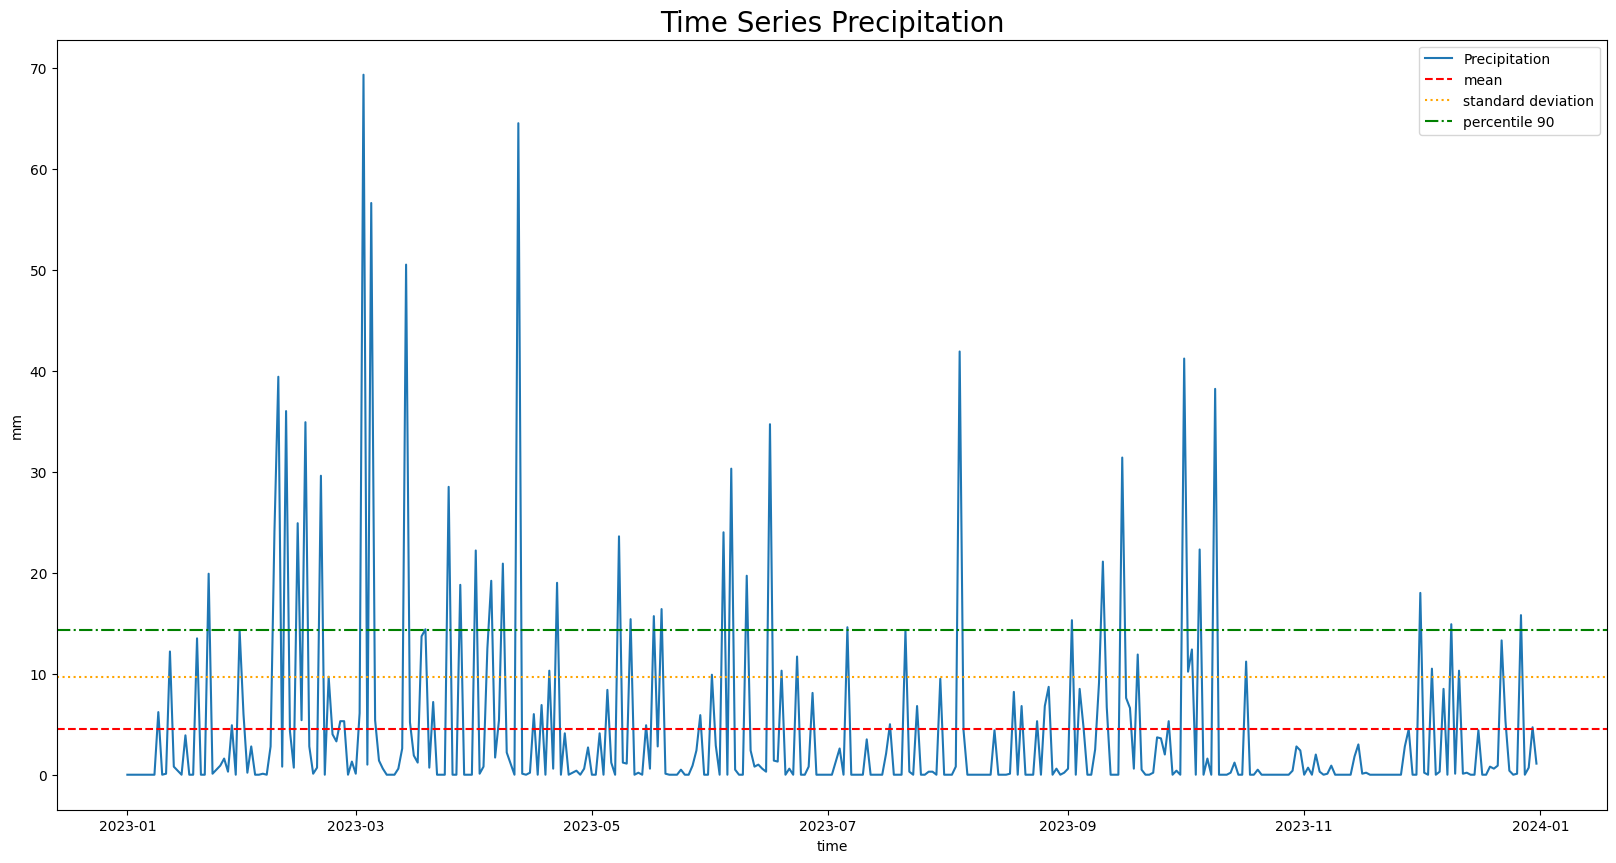

In [25]:
# Plot time series with line
plt.figure(figsize=(20, 10))
plt.plot(time, prec, label='Precipitation')
plt.title('Time Series Precipitation', fontsize=20)
plt.xlabel('time')
plt.ylabel('mm')
plt.axhline(data_mean, color='red', linestyle='--', label='mean')
plt.axhline(data_std, color='orange', linestyle=':', label='standard deviation')
plt.axhline(percentile_90, color='green', linestyle='-.', label='percentile 90')
plt.legend(loc='best')
plt.show()

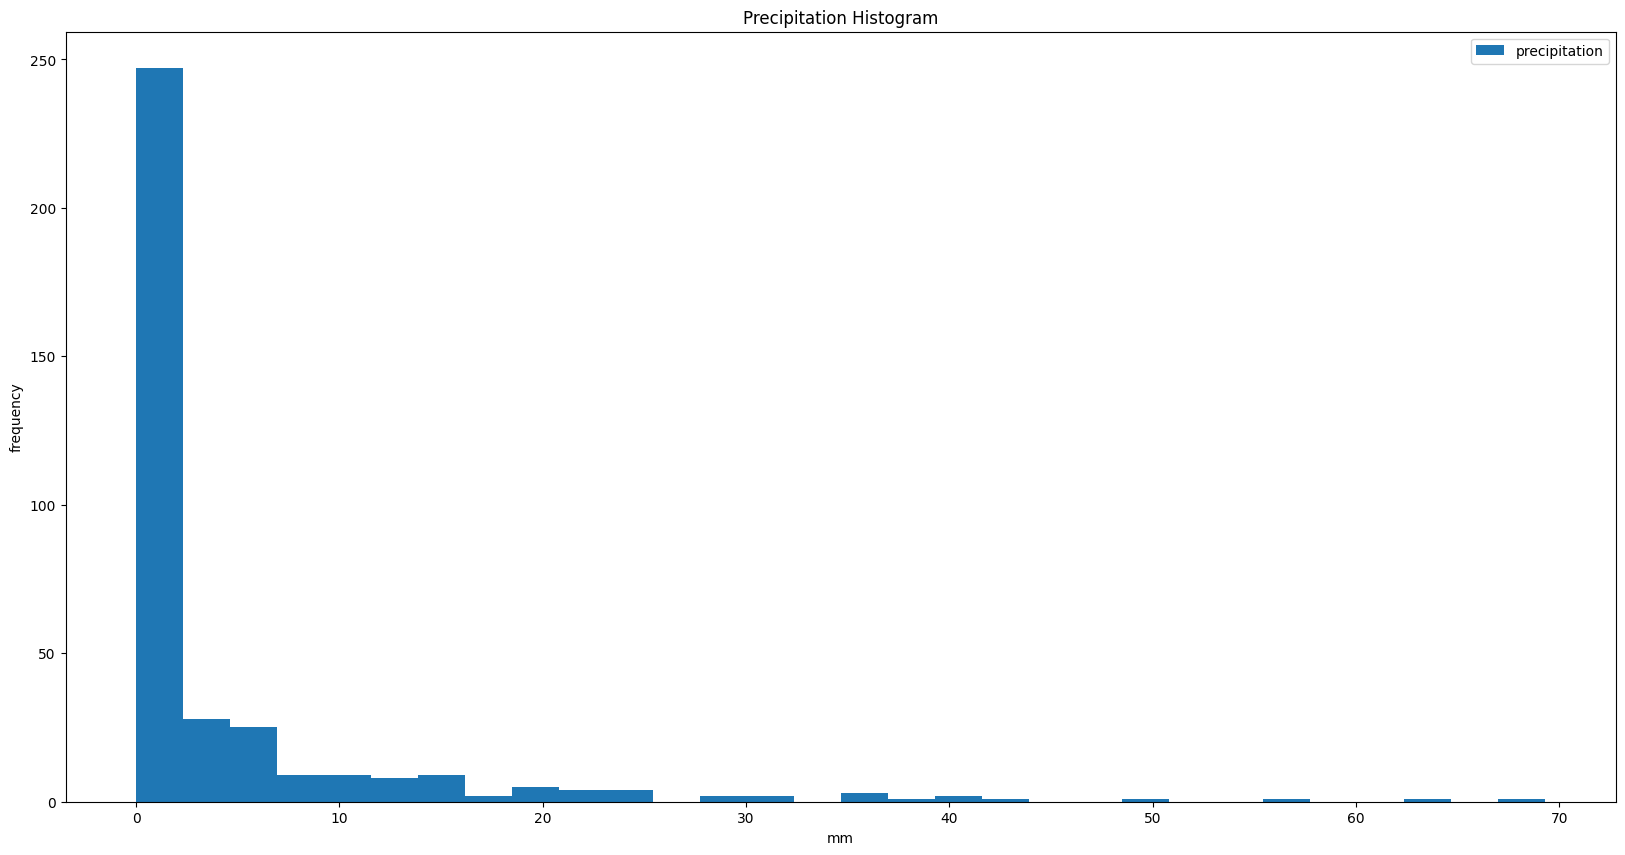

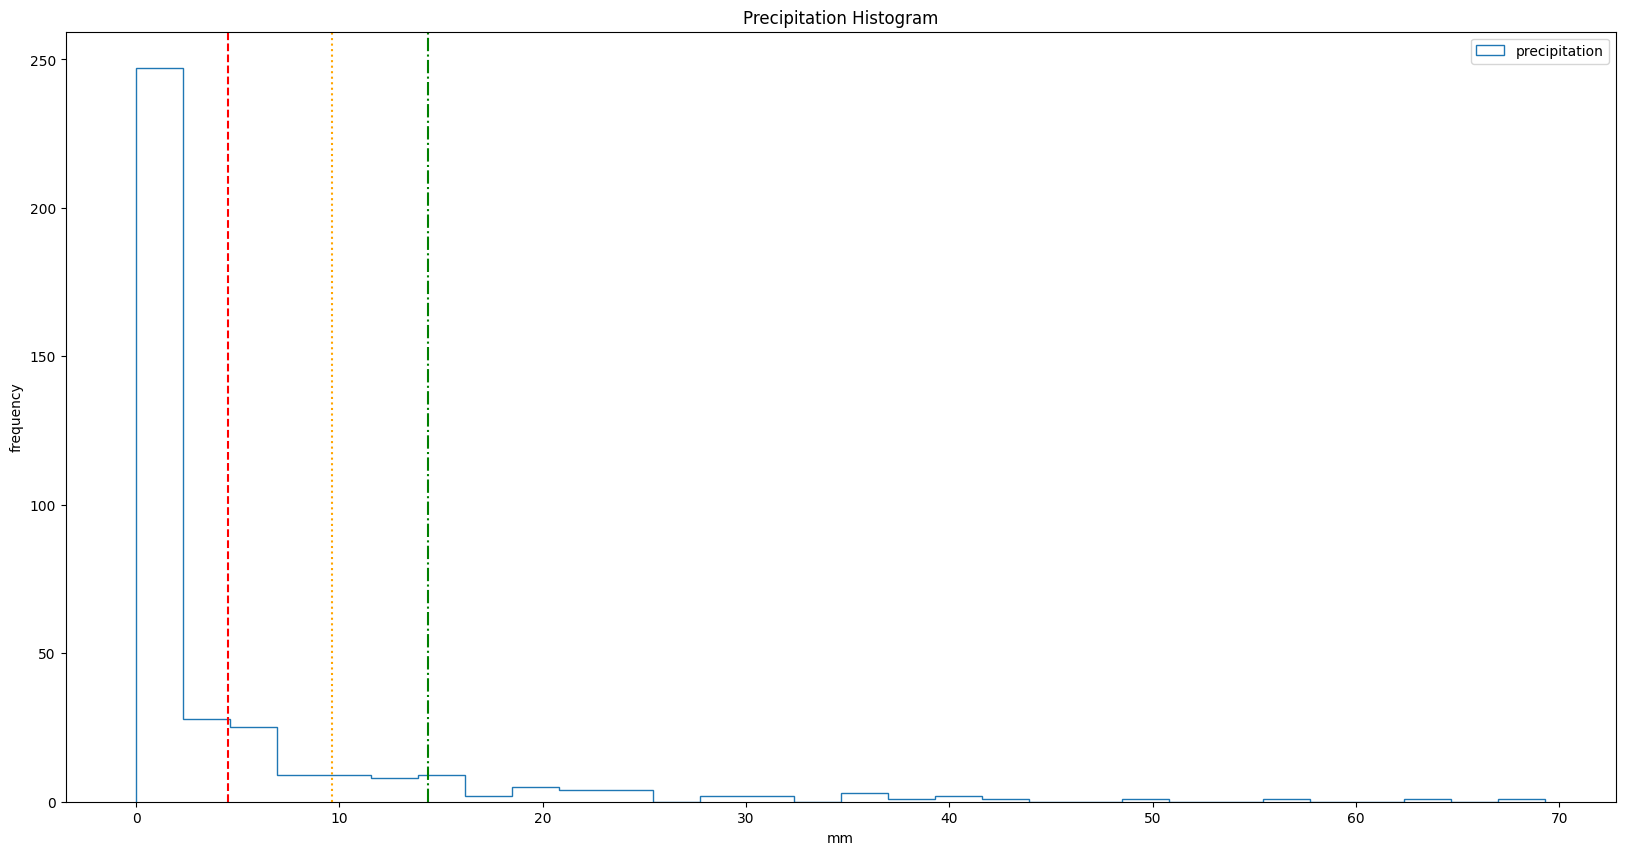

In [37]:
# ploting histogram 
plt.figure(figsize=(20, 10))
plt.hist(prec, 30, label='precipitation')
plt.title('Precipitation Histogram')
plt.xlabel('mm')
plt.ylabel('frequency')
plt.legend(loc='best')
plt.show()

# Ploting histogram with line
plt.figure(figsize=(20, 10))
plt.hist(prec, 30, label='precipitation', histtype='step')
plt.title('Precipitation Histogram')
plt.xlabel('mm')
plt.ylabel('frequency')
plt.legend(loc='best')
plt.axvline(data_mean, color='red', linestyle='--', label='mean')
plt.axvline(data_std, color='orange', linestyle=':', label='standard deviation')
plt.axvline(percentile_90, color='green', linestyle='-.', label='percentile 90')
plt.show()


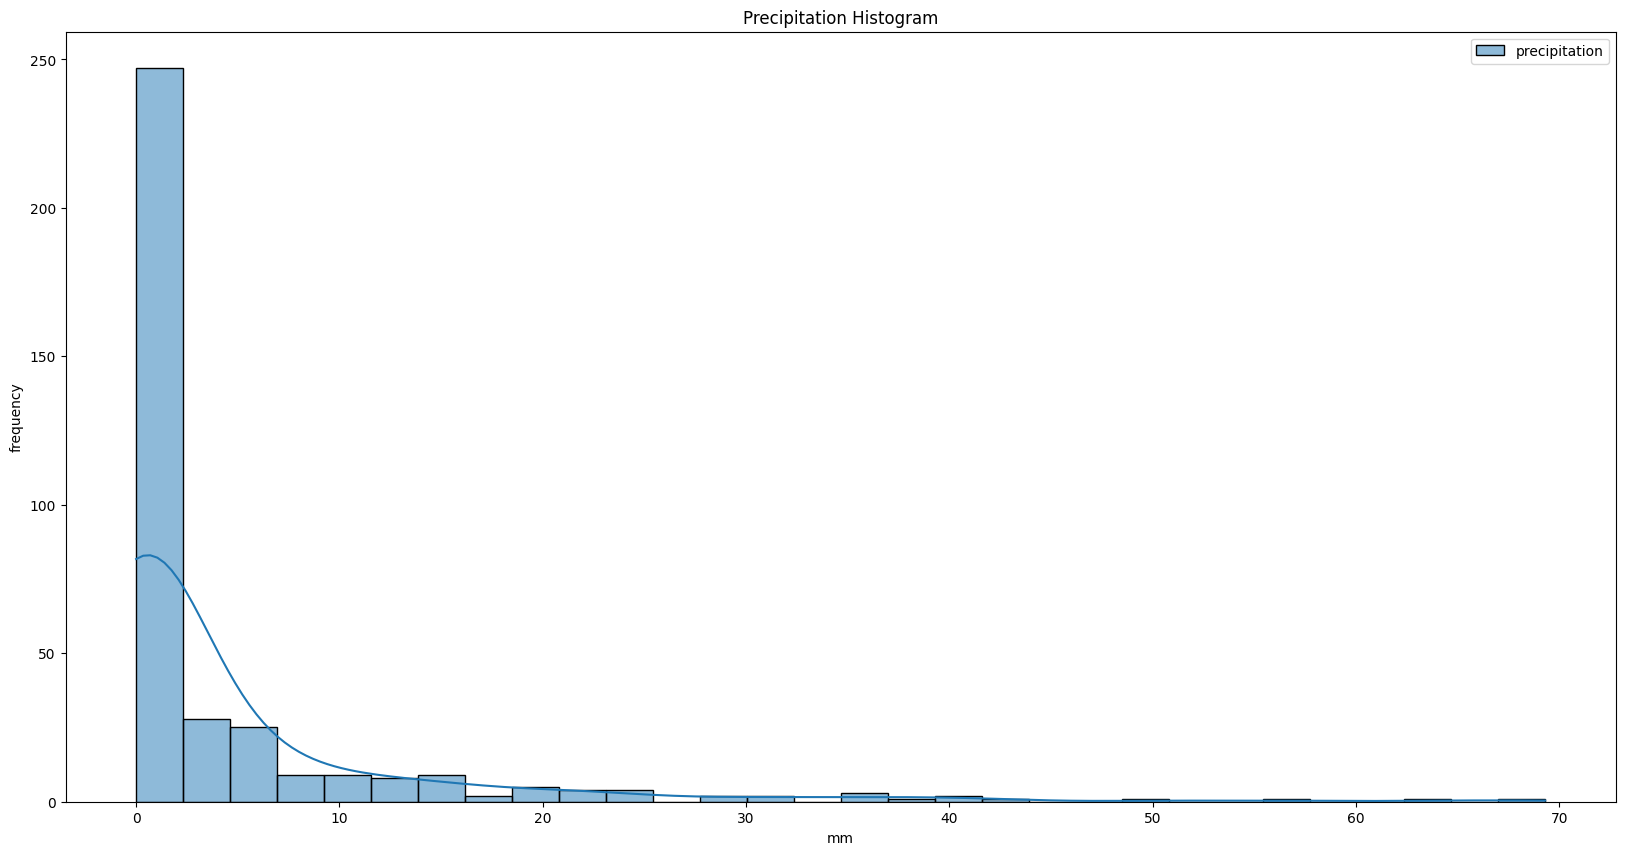

In [42]:
# ploting histogram
plt.figure(figsize=(20, 10))
sns.histplot(prec, bins=30, label='precipitation', kde=True)
plt.title('Precipitation Histogram')
plt.xlabel('mm')
plt.ylabel('frequency')
plt.legend(loc='best')
plt.show()

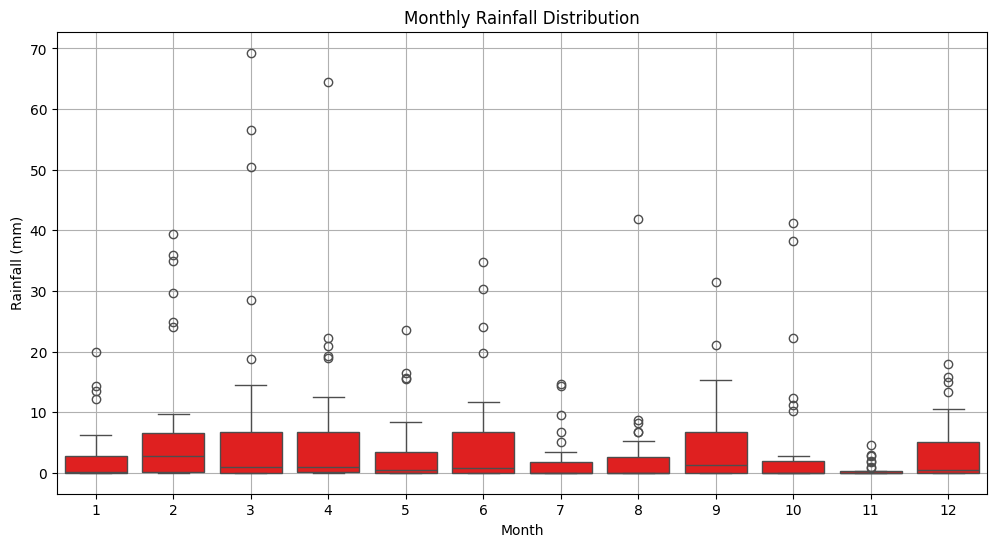

In [45]:
data_24['MONTH'] = data['DATE'].dt.month

# Plotting the boxplot for each month
plt.figure(figsize=(12, 6))
sns.boxplot(x='MONTH', y='RRRR', data=data_24, color='red')
plt.title('Monthly Rainfall Distribution')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()


In [43]:
# Correlation pandas
cor_pearson = prec.corr(evap, method='pearson')
print(f'Pearson correlation: {cor_pearson:.2f}')

cor_kendall = prec.corr(evap, method='kendall')
print(f'Kendall correlation: {cor_kendall:.2f}')


# Correlation scipy
pearson_coef, pearson_p = sps.pearsonr(prec, evap)
print(f'Pearson correlation: {pearson_coef:.2f}')

kendall_coef, kendall_p = sps.kendalltau(prec, evap)
print(f'Kendall correlation: {kendall_coef:.2f}')


Pearson correlation: 0.07
Kendall correlation: -0.04
Pearson correlation: 0.07
Kendall correlation: -0.04


slope value: 0.02
intercept value: 4.23
new slope value: 4.30
r value: 0.07


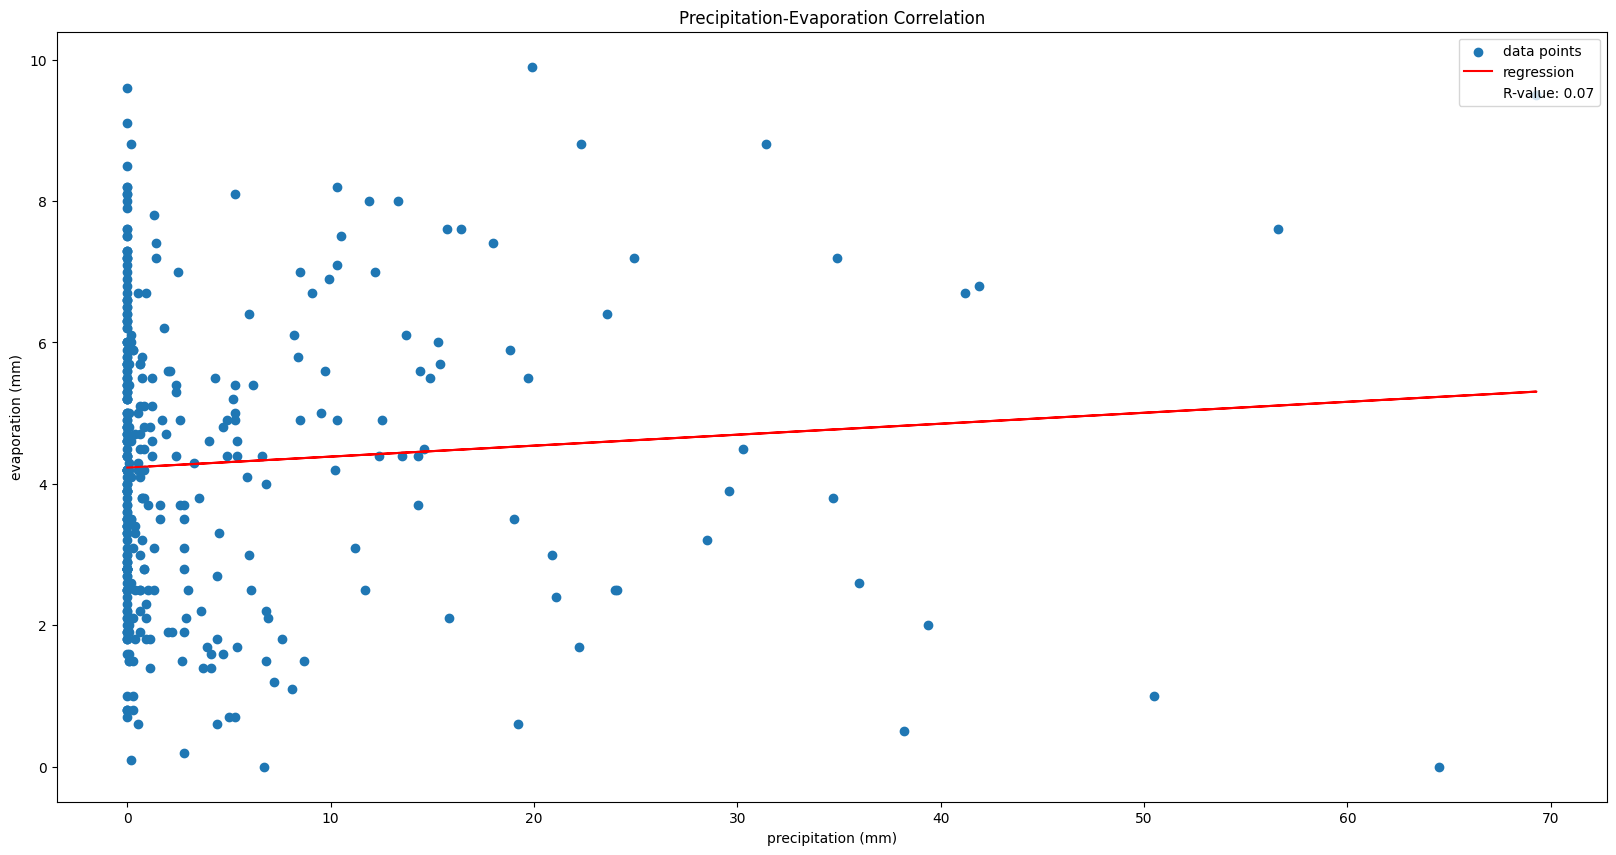

In [44]:
# Regresi linear
slope, intercept, r_value, p_value, std_err = sps.linregress(prec, evap)
new_slope = prec * slope + intercept

print(f'slope value: {slope:.2f}')
print(f'intercept value: {intercept:.2f}')
print(f'new slope value: {np.mean(new_slope):.2f}')
print(f'r value: {r_value:.2f}')

# Ploting correlation, scatter
plt.figure(figsize=(20, 10))
plt.scatter(prec, evap, label='data points')
plt.plot(prec, new_slope, color='red', label='regression')
plt.title('Precipitation-Evaporation Correlation')
plt.xlabel('precipitation (mm)')
plt.ylabel('evaporation (mm)')

# Display R-value on the plot
plt.plot([], [], ' ', label=f'R-value: {r_value:.2f}')
# plt.text(1, 1, f'R-value: {r_value:.2f}', fontsize=12, color='blue')

plt.legend(loc='upper right')
plt.show()

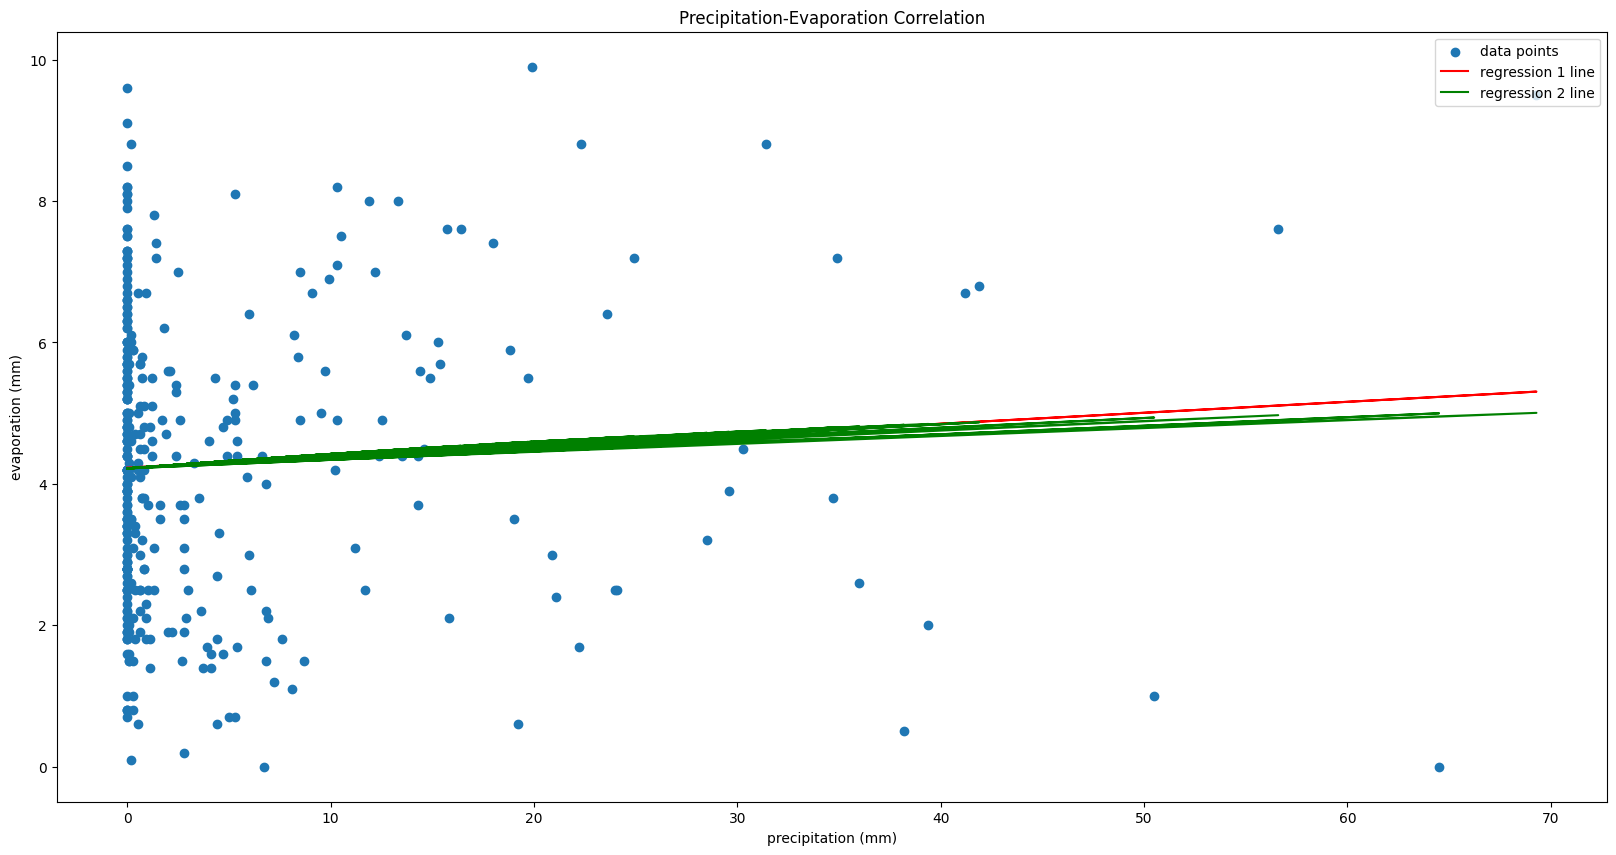

In [49]:
polin1 = np.poly1d(np.polyfit(prec, evap, 1))
polin2 = np.poly1d(np.polyfit(prec, evap, 2))

# Ploting correlation, polinom
plt.figure(figsize=(20, 10))
plt.scatter(prec, evap, label='data points')
plt.plot(prec, polin1(prec), color='red', label='regression 1 line')
plt.plot(prec, polin2(prec), color='green', label='regression 2 line')
plt.title('Precipitation-Evaporation Correlation')
plt.xlabel('precipitation (mm)')
plt.ylabel('evaporation (mm)')

plt.legend(loc='upper right')
plt.show()